Saving vectors of label - '9': 100%|██████████| 40/40 [00:00<00:00, 74.81it/s]


X_train.shape= (240, 20, 11, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 11, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 5, 32)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 5, 32)         0         
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               204928    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                        

4/4 - 0s - loss: 0.0292 - accuracy: 0.9917 - 122ms/epoch - 31ms/step
Epoch 86/100
4/4 - 0s - loss: 0.0237 - accuracy: 0.9917 - 45ms/epoch - 11ms/step
Epoch 87/100
4/4 - 0s - loss: 0.0089 - accuracy: 0.9958 - 46ms/epoch - 11ms/step
Epoch 88/100
4/4 - 0s - loss: 0.0367 - accuracy: 0.9917 - 32ms/epoch - 8ms/step
Epoch 89/100
4/4 - 0s - loss: 0.0436 - accuracy: 0.9792 - 38ms/epoch - 9ms/step
Epoch 90/100
4/4 - 0s - loss: 0.0200 - accuracy: 0.9917 - 44ms/epoch - 11ms/step
Epoch 91/100
4/4 - 0s - loss: 0.0031 - accuracy: 1.0000 - 33ms/epoch - 8ms/step
Epoch 92/100
4/4 - 0s - loss: 0.0397 - accuracy: 0.9875 - 33ms/epoch - 8ms/step
Epoch 93/100
4/4 - 0s - loss: 0.0067 - accuracy: 1.0000 - 47ms/epoch - 12ms/step
Epoch 94/100
4/4 - 0s - loss: 0.0041 - accuracy: 0.9958 - 43ms/epoch - 11ms/step
Epoch 95/100
4/4 - 0s - loss: 0.0402 - accuracy: 0.9875 - 31ms/epoch - 8ms/step
Epoch 96/100
4/4 - 0s - loss: 0.0674 - accuracy: 0.9750 - 32ms/epoch - 8ms/step
Epoch 97/100
4/4 - 0s - loss: 0.0330 - accurac

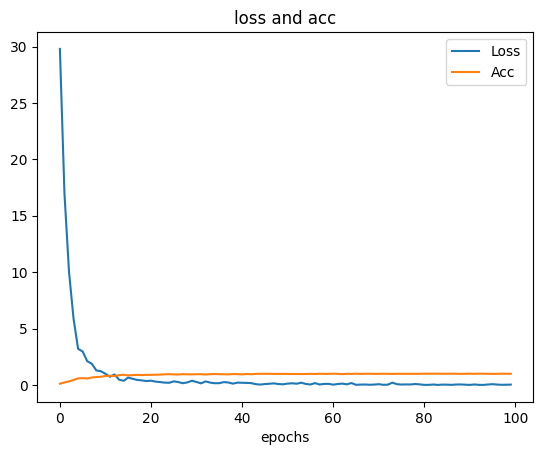

訓練時間為: 5.00 秒


In [1]:
# 導入函式庫
from preprocess_for_cnn import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time

save_data_to_array()
# 載入 data 資料夾的訓練資料，並自動分為『訓練組』及『測試組』
X_train, X_test, y_train, y_test = get_train_test()
#X_train = X_train.reshape(X_train.shape[0], 20, 11, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1)

# 類別變數轉為one-hot encoding
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print("X_train.shape=", X_train.shape)

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output size, Kernal Size: 2x2, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(2, 2),padding="same",  activation='selu', input_shape=(20, 11, 1)))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.1
model.add(Dropout(0.35))

# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.25))
# Add output layer
model.add(Dense(10, activation='softmax'))
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy'
                  ,optimizer='adam',metrics=["accuracy"])
model.summary()
start = time.time()
# 進行訓練, 訓練過程會存在 train_history 變數中
train=model.fit(X_train, y_train_hot, batch_size=60, epochs=100, verbose=2) #, validation_data=(X_test, y_test_hot)

end = time.time()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1)
#score = model.evaluate(X_test, y_test_hot, verbose=1)


'''儲存訓練過程中 的 loss and acc'''
loss = train.history['loss']
acc = train.history['accuracy']
    
'''圖形印出loss and acc '''
plt.title('loss and acc')
plt.plot(loss)
plt.plot(acc)
plt.legend(['Loss', 'Acc'])
plt.xlabel('epochs')
plt.show()
    
print("訓練時間為: {:.2f} 秒".format(end-start))
# 模型存檔
model.save('ASR.h5')  # creates a HDF5 file 'model.h5'





1/1 [==============================] - 0s 31ms/step


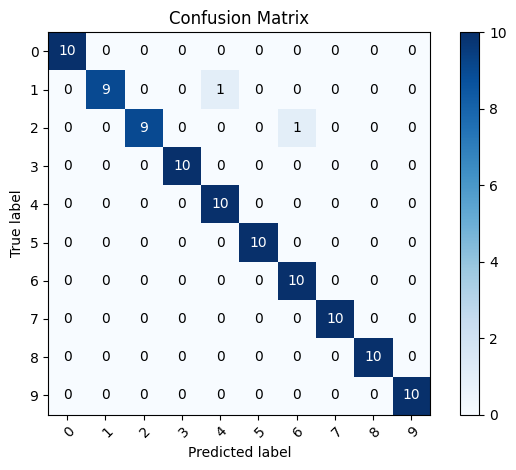

辨識正確率為: 98.0% (98/100)


In [2]:
from keras.models import load_model
import numpy as np
import librosa
import os
from plot_confusion_matrix import plot_confusion_matrix
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from preprocess_for_cnn import *
path = 'test_audio_cnn/'
def predict(model):
    pred = []
    true = []
    ii = []
    jj = []
    labels = os.listdir(path)
    for i in labels:
        for j in os.listdir(path + i):
            ii.append(i)
            jj.append(j)
            true.append(int(i[i.find('(')+1]))
            
            mfcc = wav2mfcc(path + i + '/' + j)
            mfcc_reshaped = mfcc.reshape(1, 20, 11, 1)
            tmp = model.predict(mfcc_reshaped)
            pred.append(np.argmax(tmp))
    #print(ii)
    #print()
    #print(jj)
    #print(true)
    #print()
    #print(pred)
    plot_confusion_matrix(true, pred, classes = labels,
                          title='Confusion Matrix')
    right = sum([1 for i, j in zip(true, pred) if i == j])
    acc_rate = right / len(true) * 100
    plt.savefig("Acc_"+str(acc_rate)+"_.png")
    plt.show()
    #right = sum([1 for i, j in zip(true, pred) if i == j])
    #acc_rate = right / len(true) * 100
    print('辨識正確率為: {acc}% ({t}/{p})'.format(acc=acc_rate, t=right, p=len(true)))
    

'''=======================以上完全不用改動==================='''

if __name__ == '__main__':
    '''如果要使用完整訓練的模型，請把下面兩行註解拿掉
       不用的時候請註解回去 使用自己訓練的模型
    '''
    model = load_model("ASR.h5")
    l = ["zero(0)","one(1)","two(2)","three(3)","four(4)","five(5)","six(6)","seven(7)","eigth(8)","nine(9)"]
    filepath = []
    for i in range(len(l)):
        path_ = path+l[i]+"/1_"+str(i)+".wav"
        filepath.append(path_)
    
    for i in filepath:
        #print(i)
        pass
        #print(predict(i, model=model))
 

    
    predict(model)